# Librerias Necesarias 

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from skimage.io import imread
import cv2
from keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from os.path import isfile, join
from skimage.io import imread

In [13]:
#Probamos el tranfer learning con ResNet50V2
base_model = ResNet50V2(input_shape=(224, 224, 3), include_top=True,
                       weights = "imagenet")

In [14]:
# Descargamos las Imagenes y le agreamos el Labels 
# las imagenes con mascarillas tendran el 0
# las imagenes sin mascarillas tendran el 1

X = []
Y = []
for file in os.listdir(r'C:\Users\rafae\Desktop\Proyecto Imagen\maskdata\maskdata\train\with_mask\\'):
    image = imread(r'C:\Users\rafae\Desktop\Proyecto Imagen\maskdata\maskdata\train\with_mask\\' +file)
    smallimage = cv2.resize(image,(224,224))
    X.append(smallimage)
    Y.append(0)
    
for file in os.listdir(r'C:\Users\rafae\Desktop\Proyecto Imagen\maskdata\maskdata\train\without_mask\\'):
    image = imread(r'C:\Users\rafae\Desktop\Proyecto Imagen\maskdata\maskdata\train\without_mask\\' +file)
    smallimage = cv2.resize(image,(224,224))
    X.append(smallimage)
    Y.append(1)

In [15]:
X,Y = np.array(X), np.array(Y)

In [16]:
X.shape

(661, 224, 224, 3)

In [17]:
# Normalizamos las clases entre 0 y 1 

X = X/255.0
print('Min:',np.min(X))
print('Max:',np.max(X))

Min: 0.0
Max: 1.0


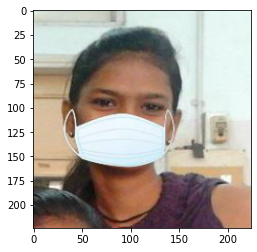

In [68]:
plt.imshow(X[4])

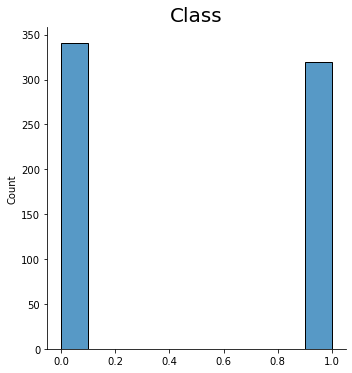

In [62]:
# Miramos y balanceamos las clases 

sns.displot(Y, kde=False , bins = 10)
plt.title('Class' , fontsize=20 )
plt.savefig("class.jpg", bbox_inches='tight' )

In [20]:
IM_SIZE = 224

In [21]:
# Dividimos los datos de entrenamiento y teste 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, 
                                                    random_state=7)
print(X_train.shape); print(X_test.shape)

(528, 224, 224, 3)
(133, 224, 224, 3)


In [22]:
# importamos las libreria y el VGG16 
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(IM_SIZE,IM_SIZE,3),
                  include_top = False,
                   weights = 'imagenet'
                  )

In [23]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:

x = layers.Flatten()(base_model.output) 

x = layers.Dense(512, activation='relu')(x) 

x = layers.Dropout(0.5)(x)

x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [26]:
vgghist = model.fit(X_train,y_train,
                    epochs = 10)

Epoch 1/10
17/17 [==============================] - 213s 13s/step - loss: 1.2250 - acc: 0.7746
Epoch 2/10
17/17 [==============================] - 237s 14s/step - loss: 0.1774 - acc: 0.9489
Epoch 3/10
17/17 [==============================] - 190s 11s/step - loss: 0.1824 - acc: 0.9545
Epoch 4/10
17/17 [==============================] - 166s 10s/step - loss: 0.1034 - acc: 0.9792
Epoch 5/10
17/17 [==============================] - 189s 11s/step - loss: 0.0185 - acc: 0.9886
Epoch 6/10
17/17 [==============================] - 183s 11s/step - loss: 0.0144 - acc: 0.9943
Epoch 7/10
17/17 [==============================] - 179s 11s/step - loss: 0.0189 - acc: 0.9924
Epoch 8/10
17/17 [==============================] - 188s 11s/step - loss: 0.0143 - acc: 0.9962
Epoch 9/10
17/17 [==============================] - 176s 10s/step - loss: 0.0053 - acc: 0.9962
Epoch 10/10
17/17 [==============================] - 186s 11s/step - loss: 0.0035 - acc: 0.9981


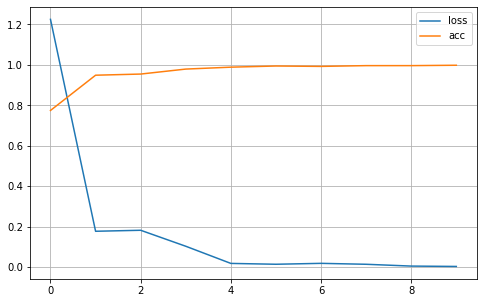

In [27]:
pd.DataFrame(vgghist.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [28]:
results = model.evaluate(X_test, y_test)
print("test loss, test accuracy", results)

5/5 [==============================] - 46s 9s/step - loss: 0.0169 - acc: 0.9850
test loss, test accuracy [0.016903676092624664, 0.9849624037742615]


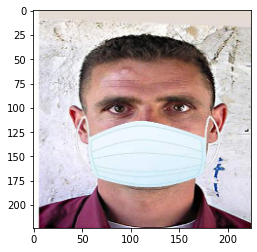

In [29]:
plt.imshow(X_test[3])

In [30]:
model.predict(np.expand_dims(X_test[3], axis=0)).round(3)

array([[0.]], dtype=float32)

In [33]:
model.save("My_model.h5")

In [56]:
import os


def read_data(path):
    X = []

    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224, 224))
        print(path + '/' + file)
        
        X.append(smallimage)

    return np.array(X)
    

test = read_data('img')

# Procesar las imagenes tal y como entran en el modelo
test = preprocess_input(test)
print(test.shape)

img/0-with-mask.jpg
img/0.png
img/1-with-mask.jpg
img/1.jpg
img/1.png
img/2-with-mask.jpg
img/2.jpg
img/2.png
img/3.jpg
img/4.jpg
img/4.png
img/8-with-mask.jpg
img/WhatsApp Image 2021-07-27 at 16.09.04.jpeg
(13, 224, 224, 3)


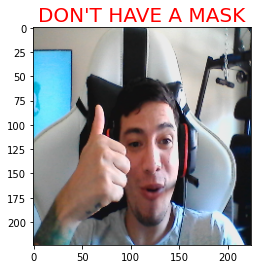

In [53]:
image = imread('test.png')
plt.imshow(image)
predictions = model.predict(np.expand_dims(image, axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')
        
plt.savefig("ejemplo1 Pearson.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


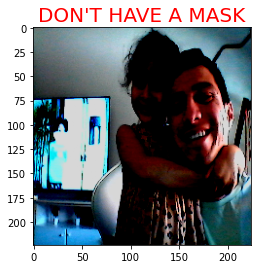

In [525]:
plt.imshow(test[7])
predictions = model.predict(np.expand_dims(test[7], axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


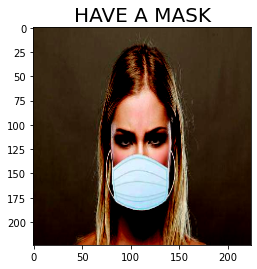

In [54]:
plt.imshow(test[5])
predictions = model.predict(np.expand_dims(test[5], axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')
        
plt.savefig("ejemplo2 Pearson.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


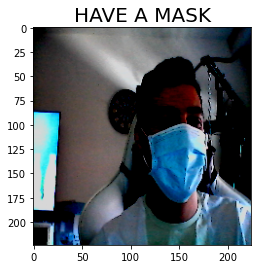

In [520]:
plt.imshow(test[1])
predictions = model.predict(np.expand_dims(test[1], axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


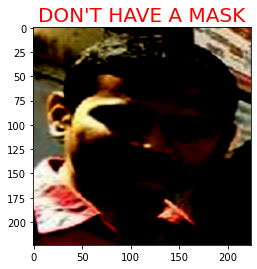

In [55]:
plt.imshow(test[3])
predictions = model.predict(np.expand_dims(test[3], axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')
        
plt.savefig("ejemplo3 Pearson.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


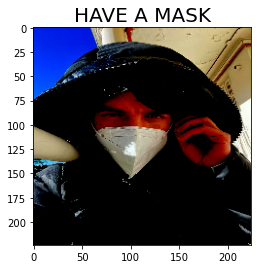

In [59]:
plt.imshow(test[12])
predictions = model.predict(np.expand_dims(test[12], axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')
        
plt.savefig("ejemplo4 Pearson.jpg")

In [3]:
from keras.models import load_model

In [4]:
model = load_model('my_model.h5')

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
import os


def read_data(path):
    X = []

    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224, 224))
        print(path + '/' + file)
        
        X.append(smallimage)

    return np.array(X)

In [25]:
prueba =read_data('prueba')

prueba/0.png
prueba/1.png
prueba/2.png


In [26]:

print(prueba.shape)

(3, 224, 224, 3)


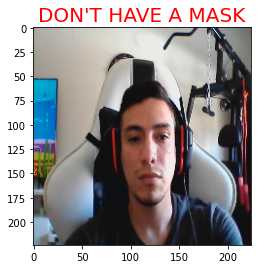

In [27]:
plt.imshow(prueba[1])
predictions = model.predict(np.expand_dims(prueba[1], axis=0)).round(3)
for pred in predictions:
    if pred < 0.5:
        plt.title("HAVE A MASK" , fontsize = 20)
    if pred > 0.5:
        plt.title("DON'T HAVE A MASK" , fontsize = 20 , color = 'red')
        


In [ ]:
plt.imshow(prueba[1])